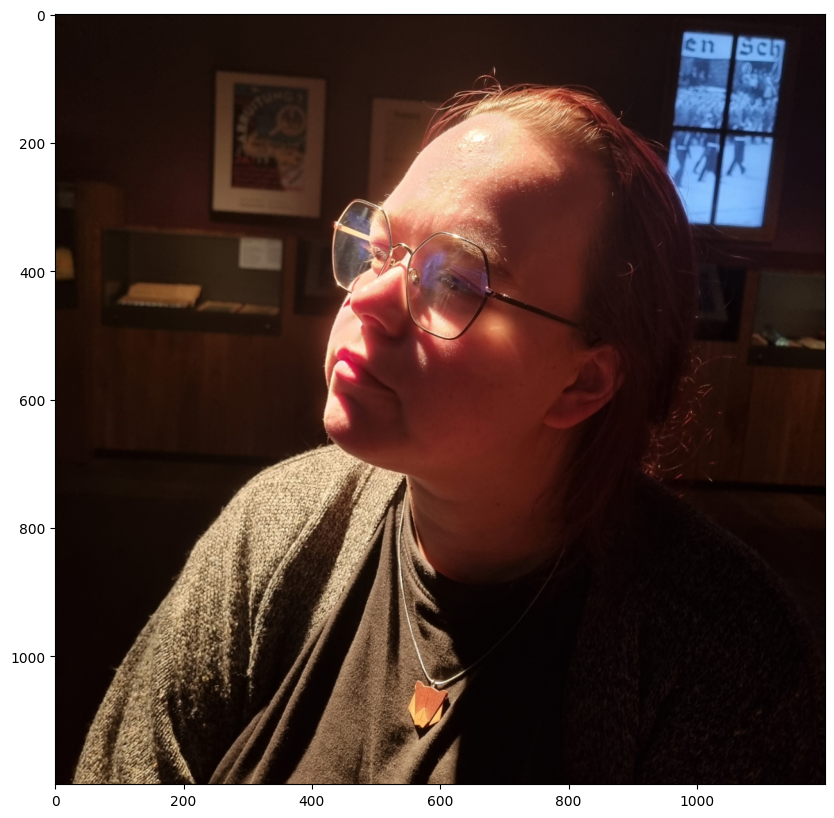

In [1]:
import cv2
import matplotlib.pyplot as plt
from photo_processor.photo_processor import PhotoProcessor

file_name = "photo_1.jpg"

photo_processor = PhotoProcessor()
photo_processor.load_image(file_name)

#image = image[400:1100, 450:1150]
photo_processor.loaded_image = photo_processor.loaded_image[300:1500, 94:]

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.imshow(cv2.cvtColor(photo_processor.loaded_image, cv2.COLOR_BGR2RGB))
plt.show()

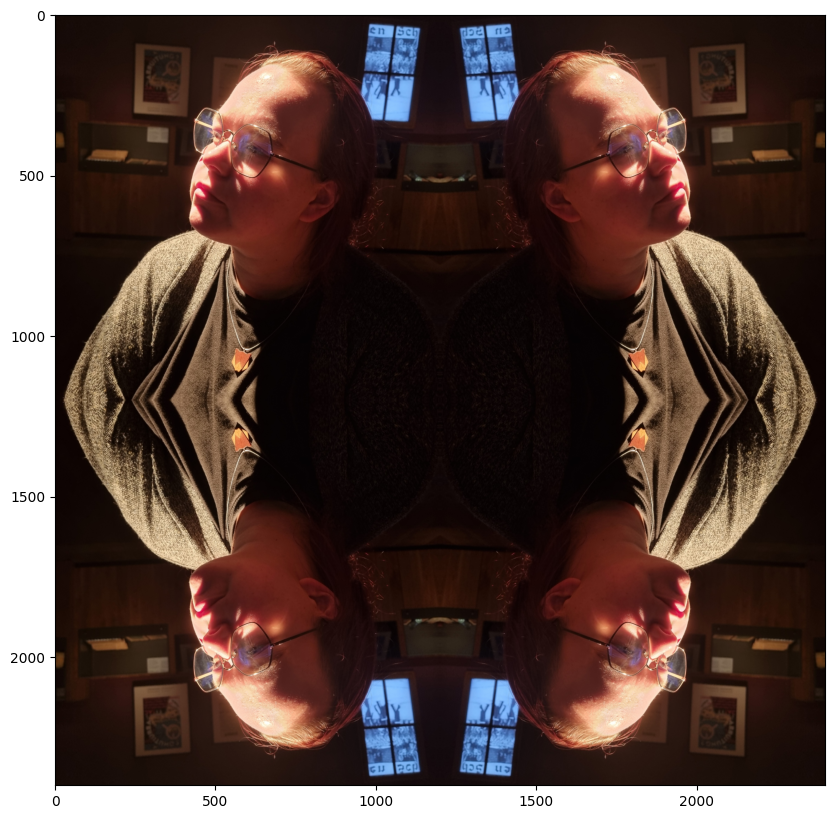

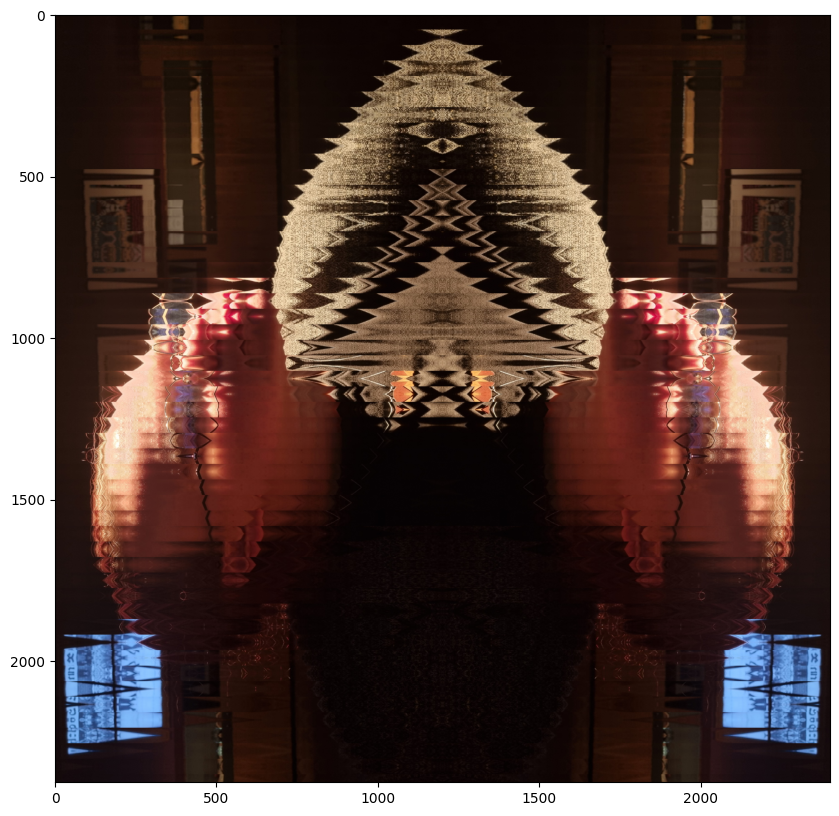

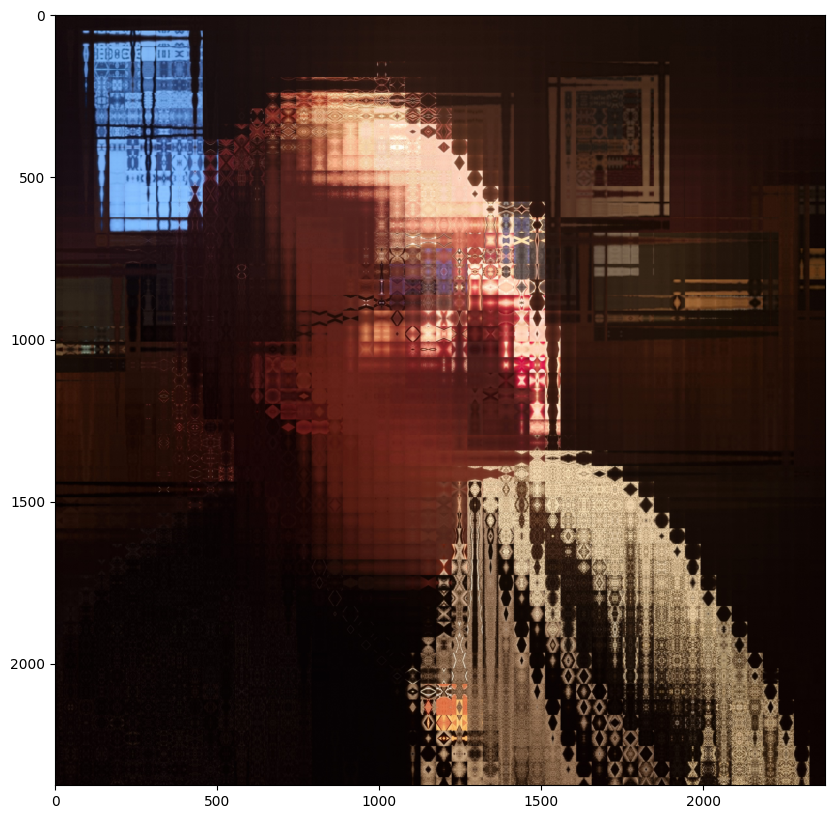

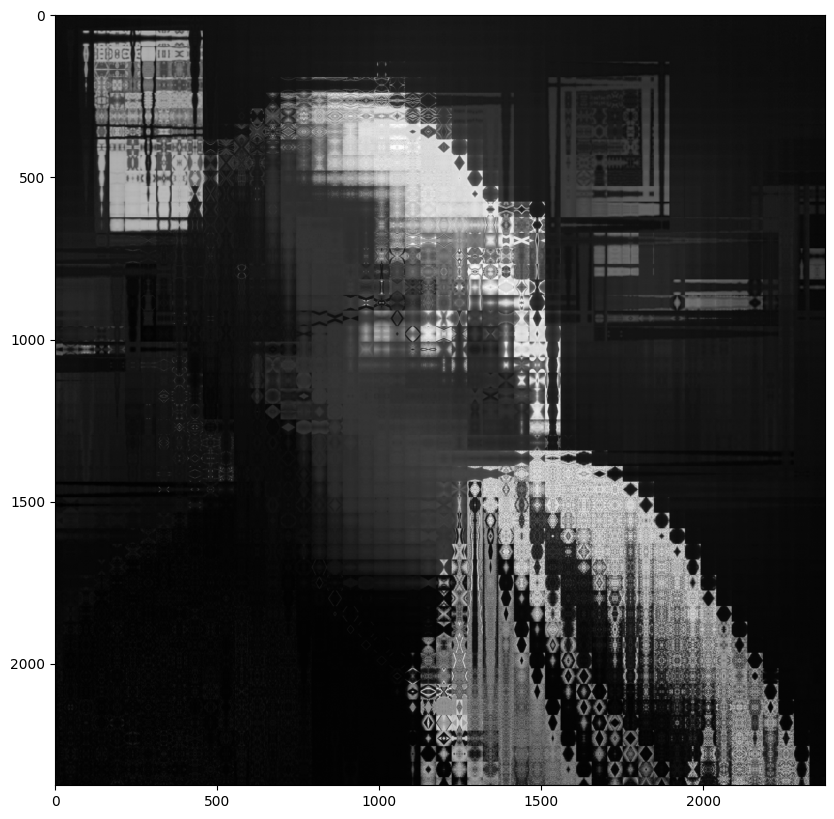

In [2]:
import numpy as np
from photo_processor.resizing import ImageResizing
from photo_processor.chattering import MosaicFilters

def image_cutter(source_image, number_of_parts = 140):
    source_image = np.array(source_image)
    output_list = []
    _, width, _ = source_image.shape
    
    tick = False
    for step in range(1, number_of_parts+1):
        image_part = source_image[:, (step-1)*(int(width/number_of_parts)): step*(int(width/number_of_parts))]
        if tick:
            output_list.append(cv2.rotate(image_part, cv2.ROTATE_90_COUNTERCLOCKWISE))
        else:
            output_list.append(cv2.rotate(image_part, cv2.ROTATE_90_CLOCKWISE))
        
    return output_list

def image_merger(image_list):
    left = 0
    right = len(image_list) - 1
    toggle = 0
    
    to_vstack = []
    while left < right:
        if toggle:
            to_vstack.append(image_list[left])
            left += 1
        else:
            to_vstack.append(image_list[right])
            right -= 1
        toggle = not toggle
        
    return np.vstack(to_vstack)

def image_to_four(image):
    image_mirrored = cv2.flip(image, 0)
    image_stacked = np.vstack([image, image_mirrored])
    
    return np.hstack([image_stacked, cv2.flip(image_stacked, 1)])

photo_processor.apply_edit(ImageResizing.image_multiply)

fig,ax  = plt.subplots(1,1, figsize=(10,10))
ax.imshow(cv2.cvtColor(photo_processor.worked_image, cv2.COLOR_BGR2RGB))

photo_processor.apply_edit(MosaicFilters.mosaic_1, number_of_parts=100)

fig,ax  = plt.subplots(1,1, figsize=(10,10))
ax.imshow(cv2.cvtColor(photo_processor.worked_image, cv2.COLOR_BGR2RGB))

photo_processor.apply_edit(MosaicFilters.mosaic_1, number_of_parts=100)

fig,ax  = plt.subplots(1,1, figsize=(10,10))
ax.imshow(cv2.cvtColor(photo_processor.worked_image, cv2.COLOR_BGR2RGB))

fig,ax  = plt.subplots(1,1, figsize=(10,10))
ax.imshow(cv2.cvtColor(photo_processor.worked_image, cv2.COLOR_BGR2GRAY), cmap="gray")